# Analysis Market Price using plotly

## 0. Preparation

### 0.1 Imports

In [44]:
import urllib.request
import json
import numpy as np
import pandas as pd
pd.options.plotting.backend = "plotly"
pd.set_option('display.max_columns', 0)
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = 'plotly_dark'
import pprint
pp = pprint.PrettyPrinter(indent=4)

BASEURL = 'http://localhost:18080/kabusapi/'
BASEURL_TEST = 'http://localhost:18081/kabusapi/'

### 0.2 Functions

#### Groupby Time

In [2]:
# freq = 1s, 1min, 5min, 1h, ...
def groupByTime(df, col, freq='1s'):
    df[col+'Time'] = pd.to_datetime(df[col+'Time'])
    df_sel = data.loc[:, [col+'Time', col]]
    df_gb = df_sel.groupby(pd.Grouper(key=col+'Time', freq=freq))
    return df_gb

#### Create Stock data

In [3]:
def CreateStockData(df, col, freq='1s'):
    df_gb = groupByTime(df, col, freq=freq)
    df_vol = groupByTime(df, 'TradingVolume', freq=freq).max()
    df_vol = df_vol.diff()
    df_stock = pd.concat([df_gb.first(), df_gb.max(), df_gb.min(), df_gb.last(), df_vol], axis=1)
    df_stock = df_stock.set_axis(['Open', 'High', 'Low', 'Close', 'Volume'], axis='columns')
    return df_stock

## 1. Data

In [4]:
data = pd.read_csv('push_data.csv')
print('data.shape:, ', data.shape)
data.head()

data.shape:,  (28665, 82)


,Unnamed: 0,OverSellQty,UnderBuyQty,TotalMarketValue,MarketOrderSellQty,MarketOrderBuyQty,BidTime,AskTime,Exchange,ExchangeName,TradingVolume,TradingVolumeTime,VWAP,TradingValue,BidQty,BidPrice,BidSign,AskQty,AskPrice,AskSign,Symbol,SymbolName,CurrentPrice,CurrentPriceTime,CurrentPriceChangeStatus,CurrentPriceStatus,CalcPrice,PreviousClose,PreviousCloseTime,ChangePreviousClose,ChangePreviousClosePer,OpeningPrice,OpeningPriceTime,HighPrice,HighPriceTime,LowPrice,LowPriceTime,SecurityType,Buy1_Sign,Buy1_Time,...,Buy2_Price,Buy2_Qty,Buy3_Price,Buy3_Qty,Buy4_Price,Buy4_Qty,Buy5_Price,Buy5_Qty,Buy6_Price,Buy6_Qty,Buy7_Price,Buy7_Qty,Buy8_Price,Buy8_Qty,Buy9_Price,Buy9_Qty,Buy10_Price,Buy10_Qty,Sell1_Sign,Sell1_Time,Sell1_Price,Sell1_Qty,Sell2_Price,Sell2_Qty,Sell3_Price,Sell3_Qty,Sell4_Price,Sell4_Qty,Sell5_Price,Sell5_Qty,Sell6_Price,Sell6_Qty,Sell7_Price,Sell7_Qty,Sell8_Price,Sell8_Qty,Sell9_Price,Sell9_Qty,Sell10_Price,Sell10_Qty
0,0,4565300.0,1662300.0,5.681751e+12,0.0,0.0,2021-09-17T09:31:48+09:00,2021-09-17T09:31:48+09:00,1,東証１部,3088300.0,2021-09-17T09:31:47+09:00,743.2365,2.295337e+09,1100.0,742.4,101,2200.0,742.1,101,4689,Ｚホールディングス,742.1,2021-09-17T09:31:47+09:00,58,1,742.1,735.7,2021-09-16T00:00:00+09:00,6.4,0.87,742.3,2021-09-17T09:00:00+09:00,746.0,2021-09-17T09:10:25+09:00,740.9,2021-09-17T09:18:42+09:00,1,101,2021-09-17T09:31:48+09:00,...,742.0,800.0,741.9,3300.0,741.8,3600.0,741.7,5800.0,741.6,3400.0,741.5,4700.0,741.4,16400.0,741.3,4700.0,741.2,6100.0,101,2021-09-17T09:31:48+09:00,742.4,1100.0,742.5,2300.0,742.6,5100.0,742.7,4900.0,742.8,5500.0,742.9,9100.0,743.0,40800.0,743.1,6100.0,743.2,6600.0,743.3,4500.0
1,0,4565900.0,1662300.0,5.681751e+12,0.0,0.0,2021-09-17T09:31:49+09:00,2021-09-17T09:31:49+09:00,1,東証１部,3089900.0,2021-09-17T09:31:49+09:00,743.2359,2.296525e+09,1100.0,742.4,101,2200.0,742.1,101,4689,Ｚホールディングス,742.1,2021-09-17T09:31:49+09:00,58,1,742.1,735.7,2021-09-16T00:00:00+09:00,6.4,0.87,742.3,2021-09-17T09:00:00+09:00,746.0,2021-09-17T09:10:25+09:00,740.9,2021-09-17T09:18:42+09:00,1,101,2021-09-17T09:31:49+09:00,...,742.0,700.0,741.9,3300.0,741.8,3600.0,741.7,5800.0,741.6,3400.0,741.5,4700.0,741.4,16400.0,741.3,4700.0,741.2,6100.0,101,2021-09-17T09:31:49+09:00,742.4,1100.0,742.5,2300.0,742.6,5100.0,742.7,4900.0,742.8,5500.0,742.9,9100.0,743.0,40800.0,743.1,6100.0,743.2,6600.0,743.3,4500.0
2,0,4577000.0,1659500.0,5.681751e+12,0.0,0.0,2021-09-17T09:31:49+09:00,2021-09-17T09:31:49+09:00,1,東証１部,3089900.0,2021-09-17T09:31:49+09:00,743.2359,2.296525e+09,100.0,742.2,101,600.0,742.1,101,4689,Ｚホールディングス,742.1,2021-09-17T09:31:49+09:00,58,1,742.1,735.7,2021-09-16T00:00:00+09:00,6.4,0.87,742.3,2021-09-17T09:00:00+09:00,746.0,2021-09-17T09:10:25+09:00,740.9,2021-09-17T09:18:42+09:00,1,101,2021-09-17T09:31:49+09:00,...,742.0,700.0,741.9,700.0,741.8,2300.0,741.7,4100.0,741.6,2100.0,741.5,4700.0,741.4,16400.0,741.3,4700.0,741.2,6100.0,101,2021-09-17T09:31:49+09:00,742.2,100.0,742.3,2100.0,742.4,1500.0,742.5,2300.0,742.6,6300.0,742.7,5400.0,742.8,5500.0,742.9,9100.0,743.0,40800.0,743.1,6100.0
3,0,4577000.0,1659500.0,5.681751e+12,0.0,0.0,2021-09-17T09:31:49+09:00,2021-09-17T09:31:49+09:00,1,東証１部,3090200.0,2021-09-17T09:31:50+09:00,743.2358,2.296747e+09,100.0,742.2,101,600.0,742.1,101,4689,Ｚホールディングス,742.1,2021-09-17T09:31:50+09:00,58,1,742.1,735.7,2021-09-16T00:00:00+09:00,6.4,0.87,742.3,2021-09-17T09:00:00+09:00,746.0,2021-09-17T09:10:25+09:00,740.9,2021-09-17T09:18:42+09:00,1,101,2021-09-17T09:31:49+09:00,...,742.0,700.0,741.9,700.0,741.8,2300.0,741.7,4100.0,741.6,2100.0,741.5,4700.0,741.4,16400.0,741.3,4700.0,741.2,6100.0,101,2021-09-17T09:31:49+09:00,742.2,100.0,742.3,2100.0,742.4,1500.0,742.5,2300.0,742.6,6300.0,742.7,5400.0,742.8,5500.0,742.9,9100.0,743.0,40800.0,743.1,6100.0
4,0,4576300.0,1659700.0,5.681751e+12,0.0,0.0,2021-09-17T09:31:50+09:00,2021-09-17T09:31:50+09:00,1,東証１部,3090200.0,2021-09-17T09:31:50+09:00,743.2358,2.296747e+09,100.0,742.2,101,200.0,742.1,101,4689,Ｚホールディングス,742.1,2021-09-17T09:31:50+09:00,58,1,

## 2. plot with graph_objects

In [36]:
def goplot(df, type='line', title='', yaxis_title='Price'):
    data = []
    if type == 'line':
        d = go.Scatter(x=df.index, y=df['High'])
        data.append(d)
    elif type == 'candle':
        d = go.Candlestick(
            x = df.index,
            open = df['Open'],
            high = df['High'],
            low = df['Low'],
            close = df['Close']
        )
        data.append(d)
        
    fig = go.Figure(
        data = data,
        layout = {
            'margin': {'l': 0, 'r': 0, 't': 40, 'b': 0},
            'title': title,
            'yaxis_title': yaxis_title,
        }
    )
    
    return fig

### line

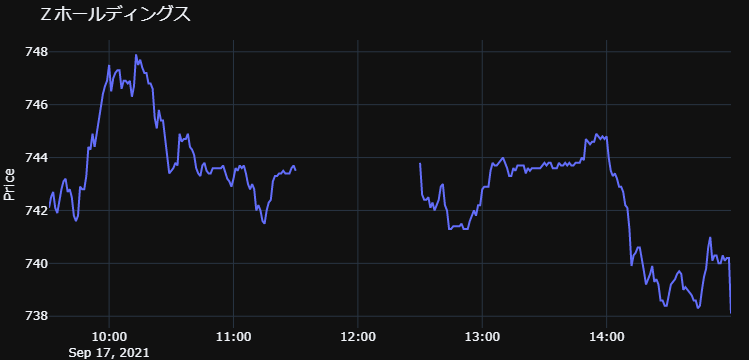

In [34]:
cp = CreateStockData(data, 'CurrentPrice', '1min')
fig = goplot(cp, type='line', title=data.SymbolName[0])
fig.show()

### candle

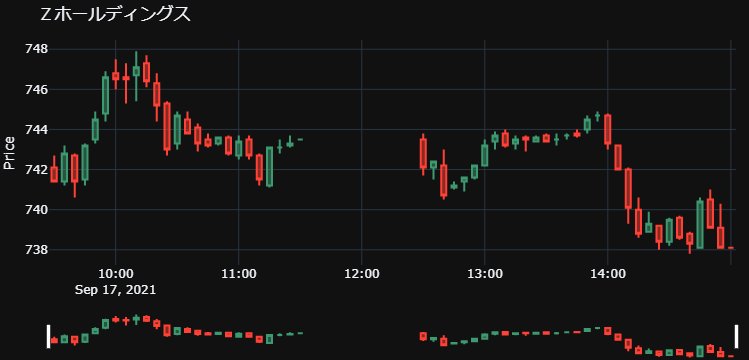

In [38]:
cp = CreateStockData(data, 'CurrentPrice', '5min')
fig = goplot(cp, type='candle', title=data.SymbolName[0])
fig.show()

### Time based increasing

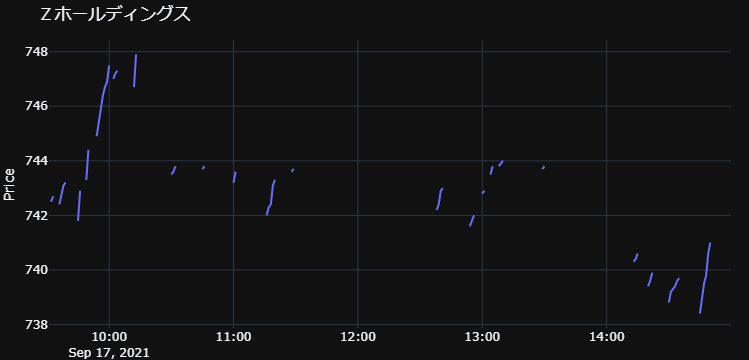

In [41]:
cp = CreateStockData(data, 'CurrentPrice', '1min')
fig = goplot(cp[cp > cp.shift()], type='line', title=data.SymbolName[0])
fig.show()

### Diff plot

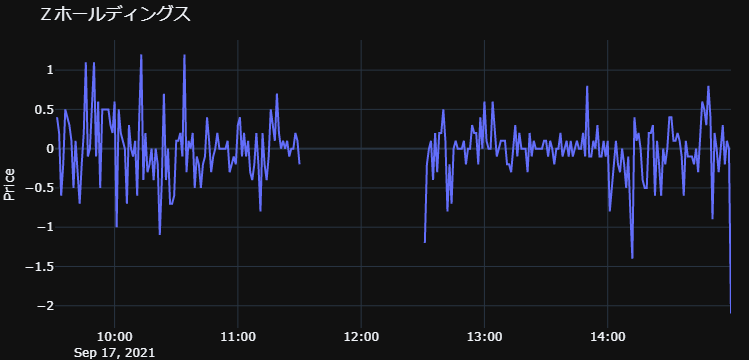

In [43]:
cp = CreateStockData(data, 'CurrentPrice', '1min')
goplot(cp.diff(), type='line', title=data.SymbolName[0])